In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import load_data_template
from src.features.games import GameFeatures
from src.features.games_detailed import GameDetailedFeatures
from src.features.seeds import SeedFeatures

In [3]:
data = load_data_template(season=False)
data.dropna(subset=['a_win'], inplace=True)
data.sample()

,Season,team_a,team_b,in_target,game_set,a_win,DayNum
9129,1985,1130,1403,False,0,True,137


In [4]:
game_feat = GameFeatures(default_lags=3)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_season, combine='subtract').fillna(0)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_in_tourney, combine='subtract').fillna(0)
data = game_feat.per_team_wrapper(data, game_feat.last_games_won_against_opponent, per_game=True, combine='subtract').fillna(0)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, per_game=True, combine='subtract').fillna(0)
game_detail_feat = GameDetailedFeatures(default_lags=3)
data = game_detail_feat.per_team_wrapper(data, game_detail_feat.detail_features_by_game, per_day=True, combine='subtract').fillna(0)
seed_feat = SeedFeatures()
data = seed_feat.per_team_wrapper(data, seed_feat.team_seeds, combine='subtract').fillna(0)
data.dropna(inplace=True)
data.sample()

,Season,team_a,team_b,in_target,game_set,a_win,DayNum,last_games_won_in_season_combined,last_games_won_in_season_combined_lag-1,last_games_won_in_season_combined_lag-2,...,Stl_game_combined_lag-1,Stl_game_combined_lag-2,Stl_game_combined_lag-3,Blk_game_combined_lag-1,Blk_game_combined_lag-2,Blk_game_combined_lag-3,PF_game_combined_lag-1,PF_game_combined_lag-2,PF_game_combined_lag-3,seed_combined
10079,2000,1116,1274,False,0,False,137,-2,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [5]:
libfm_pred = pd.read_csv('data/libfm_model_out.csv', dtype={
    'team_a': str,
    'team_b': str,
    'Season': int
})
data = pd.merge(data, libfm_pred, on=['Season', 'team_a', 'team_b', 'DayNum'])\
    .rename(columns={'Pred': 'libfm_pred'}).drop('ID', axis=1)
data.head()

,Season,team_a,team_b,in_target,game_set,a_win,DayNum,last_games_won_in_season_combined,last_games_won_in_season_combined_lag-1,last_games_won_in_season_combined_lag-2,...,Stl_game_combined_lag-2,Stl_game_combined_lag-3,Blk_game_combined_lag-1,Blk_game_combined_lag-2,Blk_game_combined_lag-3,PF_game_combined_lag-1,PF_game_combined_lag-2,PF_game_combined_lag-3,seed_combined,libfm_pred
0,2014,1107,1196,True,0,False,136,-14,-2.0,-4.0,...,-6.0,-6.0,-1.0,3.0,0.0,-3.0,3.0,2.0,15,0.037748
1,2014,1107,1291,True,0,True,134,2,6.0,11.0,...,-4.0,1.0,1.0,-3.0,-4.0,-7.0,-3.0,-2.0,0,0.978570
2,2014,1110,1458,True,0,False,136,-6,-13.0,-4.0,...,-2.0,-2.0,-3.0,1.0,0.0,0.0,6.0,3.0,13,0.008551
3,2014,1112,1211,True,0,True,139,3,-5.0,-2.0,...,-2.0,-2.0,7.0,0.0,-1.0,-3.0,-4.0,-9.0,-7,0.873457
4,2014,1112,1361,True,0,True,143,3,5.0,-1.0,...,-4.0,-2.0,8.0,9.0,3.0,-5.0,10.0,-3.0,-3,0.962323


In [6]:
knn_pred = pd.read_csv('data/knn_model_out.csv', dtype={
    'team_a': str,
    'team_b': str,
    'Season': int
})
data = pd.merge(data, knn_pred, on=['Season', 'team_a', 'team_b', 'DayNum'])\
    .rename(columns={'Pred': 'knn_pred'}).drop('ID', axis=1)
data.head()

,Season,team_a,team_b,in_target,game_set,a_win,DayNum,last_games_won_in_season_combined,last_games_won_in_season_combined_lag-1,last_games_won_in_season_combined_lag-2,...,Stl_game_combined_lag-3,Blk_game_combined_lag-1,Blk_game_combined_lag-2,Blk_game_combined_lag-3,PF_game_combined_lag-1,PF_game_combined_lag-2,PF_game_combined_lag-3,seed_combined,libfm_pred,knn_pred
0,2014,1107,1196,True,0,False,136,-14,-2.0,-4.0,...,-6.0,-1.0,3.0,0.0,-3.0,3.0,2.0,15,0.037748,0.933333
1,2014,1107,1291,True,0,True,134,2,6.0,11.0,...,1.0,1.0,-3.0,-4.0,-7.0,-3.0,-2.0,0,0.978570,1.000000
2,2014,1110,1458,True,0,False,136,-6,-13.0,-4.0,...,-2.0,-3.0,1.0,0.0,0.0,6.0,3.0,13,0.008551,0.333333
3,2014,1112,1211,True,0,True,139,3,-5.0,-2.0,...,-2.0,7.0,0.0,-1.0,-3.0,-4.0,-9.0,-7,0.873457,0.200000
4,2014,1112,1361,True,0,True,143,3,5.0,-1.0,...,-2.0,8.0,9.0,3.0,-5.0,10.0,-3.0,-3,0.962323,0.733333


Metric Mean: 0.39 (0.02)


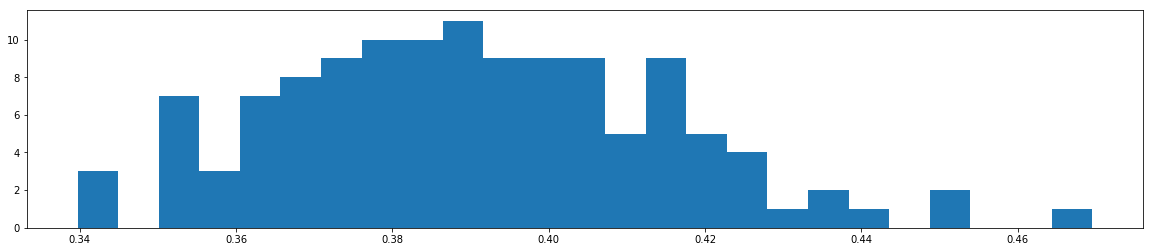

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss


X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win', 'game_set']]

metrics = []
for i in range(25):
    kf = KFold(n_splits=5, shuffle=True)
    for tr_i, t_i in kf.split(X):
        X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i].a_win
        X_t, y_t = X.iloc[t_i], y.iloc[t_i].a_win
        xgb = XGBClassifier(max_depth=7, subsample=.8)
        xgb.fit(X_tr.values, y_tr)
        preds = xgb.predict_proba(X_t.values)
        ncaa_true = y.iloc[t_i][y.iloc[t_i].game_set == 0]
        ncaa_pred = preds[y.iloc[t_i].reset_index().game_set == 0]
        metric = log_loss(ncaa_true.a_win.astype(int), ncaa_pred, labels=(0, 1))
    #     print(metric)
        metrics.append(metric)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))
plt.figure(figsize=(20,4))
plt.hist(metrics, bins=25)
plt.show()

In [9]:
data.astype({'a_win': int}).corr().abs().sort_values('a_win', ascending=False)[['a_win']]

,a_win
a_win,1.000000
seed_combined,0.501111
last_games_won_in_season_combined,0.376833
DR_game_combined_lag-1,0.352485
DR_game_combined_lag-2,0.344122
PF_game_combined_lag-3,0.340154
DR_game_combined_lag-3,0.336531
PF_game_combined_lag-2,0.327159
PF_game_combined_lag-1,0.325803
FGM_game_combined_lag-3,0.315907


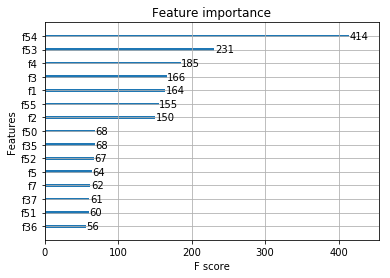

In [10]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features=15, importance_type='weight')
plt.show()